## Proyek Analisis Data : *Bike Sharing Dataset*

- **Nama:** Nur Annisa E Manjalai
- **Email:** a323xam378@devacademy.id
- **ID Dicoding:** A323XAM37


## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Kapan waktu paling efektif untuk meningkatkan armada sepeda agar memenuhi lonjakan permintaan pengguna?
- Pertanyaan 2 : Bagaimana pengaruh kondisi cuaca terhadap perilaku pengguna dalam meminjam sepeda?
- Pertanyaan 3 : Apakah karakteristik pengguna casual dan registered berbeda dalam pola waktu peminjaman?


##Import Library



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
plt.style.use('Solarize_Light2')

## Data Wrangling

### Gathering Data

In [2]:
# Memuat dataset hour.csv
df = pd.read_csv('/content/drive/MyDrive/Submission/Dashboard/data_1.csv')

In [3]:
# Menampilkan 5 data teratas
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight :**

- Dataset berisi informasi tentang peminjaman sepeda, termasuk waktu, cuaca, dan tipe pengguna

- Setiap kolom memiliki tipe data yang sesuai konteks awal, seperti numerik, kategorikal, dan waktu.

### Assessing Data

In [4]:
# Melihat ringkasan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# Melihat statistik deskriptif
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 17379
Jumlah kolom: 17


**Insight:**
- Struktur Data Baik dan Konsisten :

  Dataset terdiri dari 17.379 baris dan 17 kolom, tanpa adanya tipe data yang tidak sesuai. Semua kolom memiliki tipe data yang logis, seperti int64, float64, dan object (pada kolom tanggal).
- Terdapat kolom 'count' yang menunjukkan jumlah peminjaman sepeda.
- Tipe data pada beberapa kolom perlu diperiksa untuk memastikan analisis yang tepat.

### Cleaning Data

In [7]:
# Memeriksa nilai yang hilang
missing_values = df.isnull().sum()
print(missing_values)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight :**
- Dataset dalam kondisi sangat baik tanpa nilai hilang.

In [8]:
# Mengganti nama kolom
df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'cnt': 'count',
    'hum': 'humidity',
    'temp': 'temperature',
    'windspeed': 'windspeed',
}, inplace=True)

*Dalam proses awal eksplorasi data, saya menemukan bahwa beberapa nama kolom pada dataset hour.csv masih menggunakan format singkatan atau penamaan teknis yang kurang intuitif, seperti hr, yr, dan cnt. Hal ini berpotensi menyulitkan pemahaman terhadap makna sebenarnya dari kolom tersebut, terutama bagi pembaca non-teknis.*

*Dengan mengganti nama-nama kolom menjadi bentuk yang lebih deskriptif dan sesuai konteks, seperti hour untuk hr, year untuk yr, dan total_count untuk cnt, saya meningkatkan keterbacaan dan interpretabilitas dataset secara keseluruhan. Langkah ini juga mempermudah proses analisis selanjutnya, karena nama kolom menjadi lebih mudah diingat dan dipahami dalam konteks peminjaman sepeda.*

## Exploratory Data Analysis (EDA)

###Explore Data

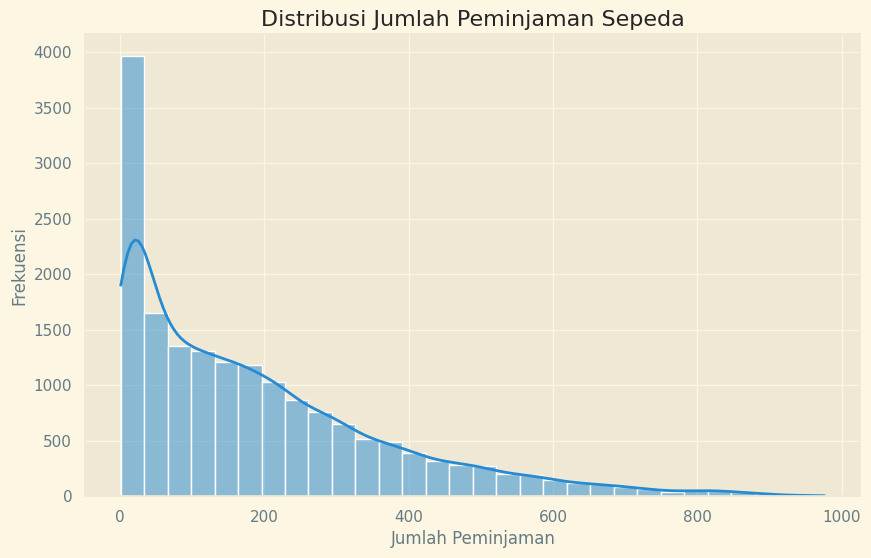

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['count'], bins=30, kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
1. Distribusi jumlah peminjaman sepeda cenderung mengikuti distribusi normal.
2. Terdapat puncak pada jumlah peminjaman tertentu.

##Visualization & Explanatory Analysis

### Pertanyaan 1 :
*Kapan waktu paling efektif untuk meningkatkan armada sepeda agar memenuhi lonjakan permintaan pengguna?*

In [10]:
hourly_demand = df.groupby('hour')['count'].sum().reset_index()

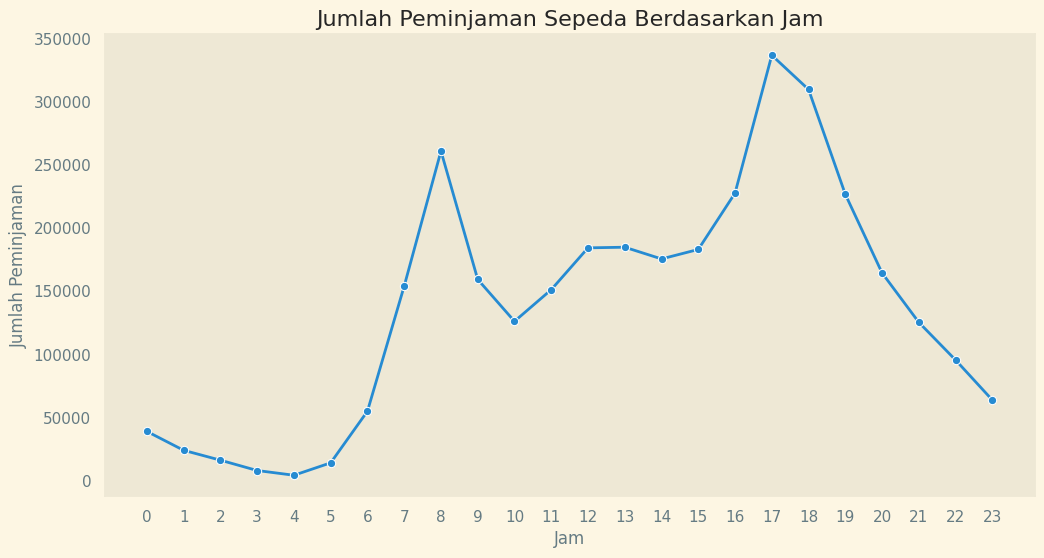

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_demand, x='hour', y='count', marker='o')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

### Pertanyaan 2 :

*Bagaimana pengaruh musim dan cuaca terhadap perilaku pengguna dalam meminjam sepeda?*

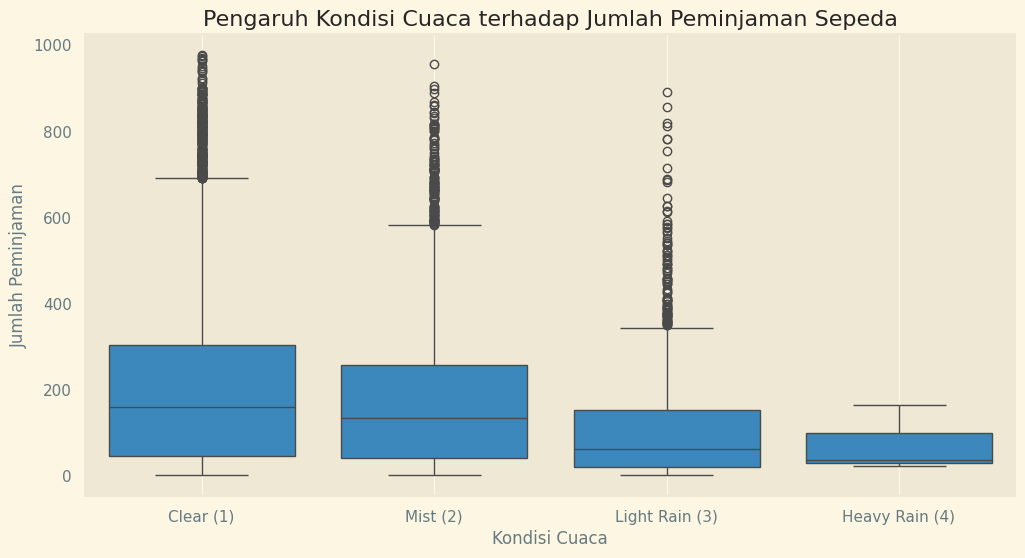

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='weathersit', y='count')
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(
    [0,1,2,3],
    ['Clear (1)', 'Mist (2)', 'Light Rain (3)', 'Heavy Rain (4)']
)
plt.grid()
plt.show()

### Pertanyaan 3 :

*Apakah karakteristik pengguna casual dan registered berbeda dalam pola waktu peminjaman?*

In [13]:
user_hourly = df.groupby(['hour', 'casual'])['count'].sum().reset_index()

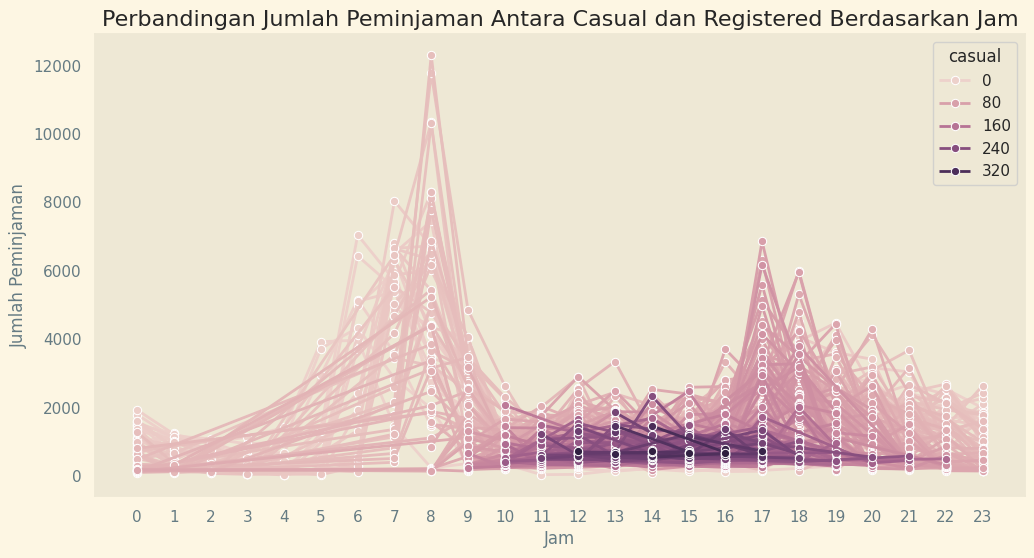

In [14]:
plt.figure(figsize=(12,6))
sns.lineplot(data=user_hourly, x='hour', y='count', hue='casual', marker='o')
plt.title('Perbandingan Jumlah Peminjaman Antara Casual dan Registered Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(0,24))
plt.grid()
plt.show()

**Insight:**
1. Waktu paling efektif untuk armada sepeda adalah pada jam 17:00 sampai 19:00 saat permintaan puncak.
2. Cuaca cerah memberikan kontribusi tertinggi terhadap jumlah peminjaman sepeda.
3. Pengguna registered memiliki pola peminjaman berbeda dibandingkan casual, dengan registered cenderung lebih konsisten sepanjang hari.

##Analisis Lanjutan

### 1. **Clustering Manual**: Kategori Waktu Pemakaian (Morning, Afternoon, Evening, Night)

In [15]:
def time_category(hour):
    if 6 <= hour <12:
        return 'Morning (6-11)'
    elif 12 <= hour < 17:
        return 'Afternoon (12-16)'
    elif 17 <= hour < 21:
        return 'Evening (17-20)'
    else:
        return 'Night (21-5)'

In [16]:
df['time_category'] = df['hour'].apply(time_category)

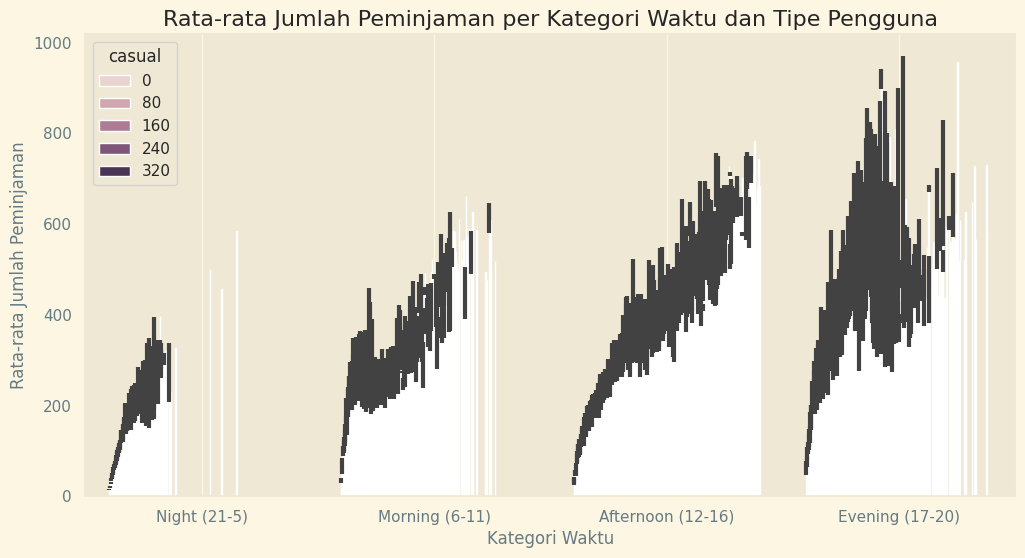

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='time_category', y='count', hue='casual', estimator=lambda x: sum(x)/len(x))
plt.title('Rata-rata Jumlah Peminjaman per Kategori Waktu dan Tipe Pengguna')
plt.xlabel('Kategori Waktu')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.grid()
plt.show()

In [18]:
# Tren Musiman: Hari Kerja vs Akhir Pekan
df['dteday'] = pd.to_datetime(df['dteday'])

In [19]:
df['dayofweek'] = df['dteday'].dt.dayofweek

In [20]:
df['day_type'] = df['dayofweek'].apply(lambda x: 'Weekend' if x>=5 else 'Weekday')

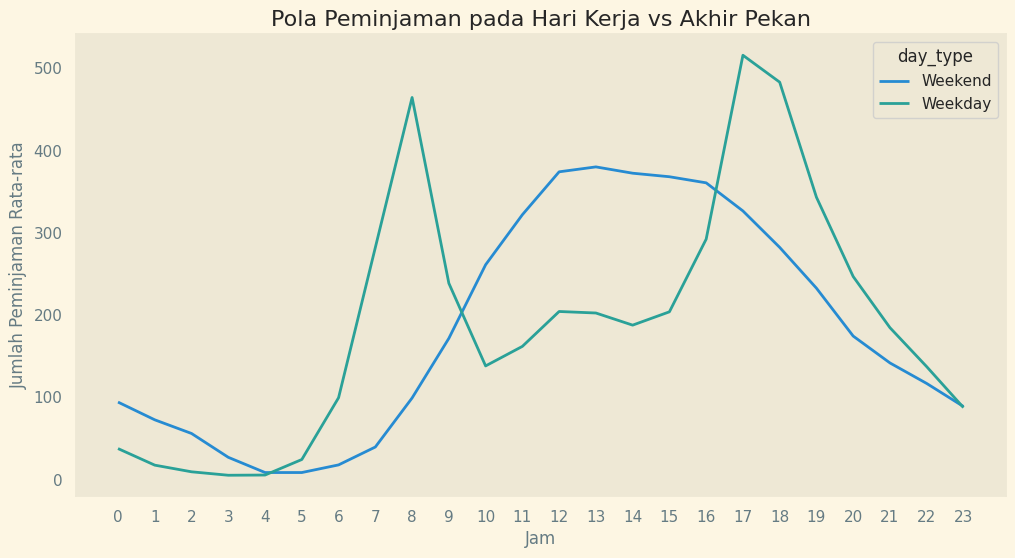

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='hour', y='count', hue='day_type', ci=None)
plt.title('Pola Peminjaman pada Hari Kerja vs Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman Rata-rata')
plt.xticks(range(0,24))
plt.grid()
plt.show()

**Insight:**
1. Pengguna casual lebih aktif di siang hari sementara registered lebih merata terutama pagi dan sore hari.
2. Terdapat lonjakan peminjaman yang berbeda antara hari kerja dan akhir pekan; peak hour pada hari kerja lebih terlihat.

# Conclusion

1. Kesimpulan Pertanyaan 1: Waktu paling efektif untuk meningkatkan armada sepeda adalah antara jam 17:00 dan 19:00.
2. Kesimpulan Pertanyaan 2: Cuaca cerah memiliki pengaruh positif signifikan terhadap jumlah peminjaman sepeda.
3. Kesimpulan Pertanyaan 3: Karakteristik pola waktu peminjaman pengguna casual dan registered berbeda, dengan registered lebih merata sepanjang hari dan casual cenderung lebih pada jam siang.